In [116]:
import pandas as pd
import numpy as np

In [186]:
data = pd.read_csv("data/choco.csv")
dq=data
data.head(2)

,Company \r\n(Maker-if known),Specific Bean Origin\r\nor Bar Name,REF,Review\r\nDate,Cocoa\r\nPercent,Company\r\nLocation,Rating,Bean\r\nType,Broad Bean\r\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo


In [187]:
dq.columns=['company', 'name-origin', 'ref', 'review', 'cacao', 'location', 'rating', 'bean', 'bean-origin']
dq.head(2)

,company,name-origin,ref,review,cacao,location,rating,bean,bean-origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo


In [188]:
dq.isnull().sum().sort_values(ascending=False)

bean           1
bean-origin    1
company        0
name-origin    0
ref            0
review         0
cacao          0
location       0
rating         0
dtype: int64

In [189]:
dq['bean'].value_counts()


                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         1
Foraster

In [163]:
#pip install missingno
import missingno as msno

<AxesSubplot:>

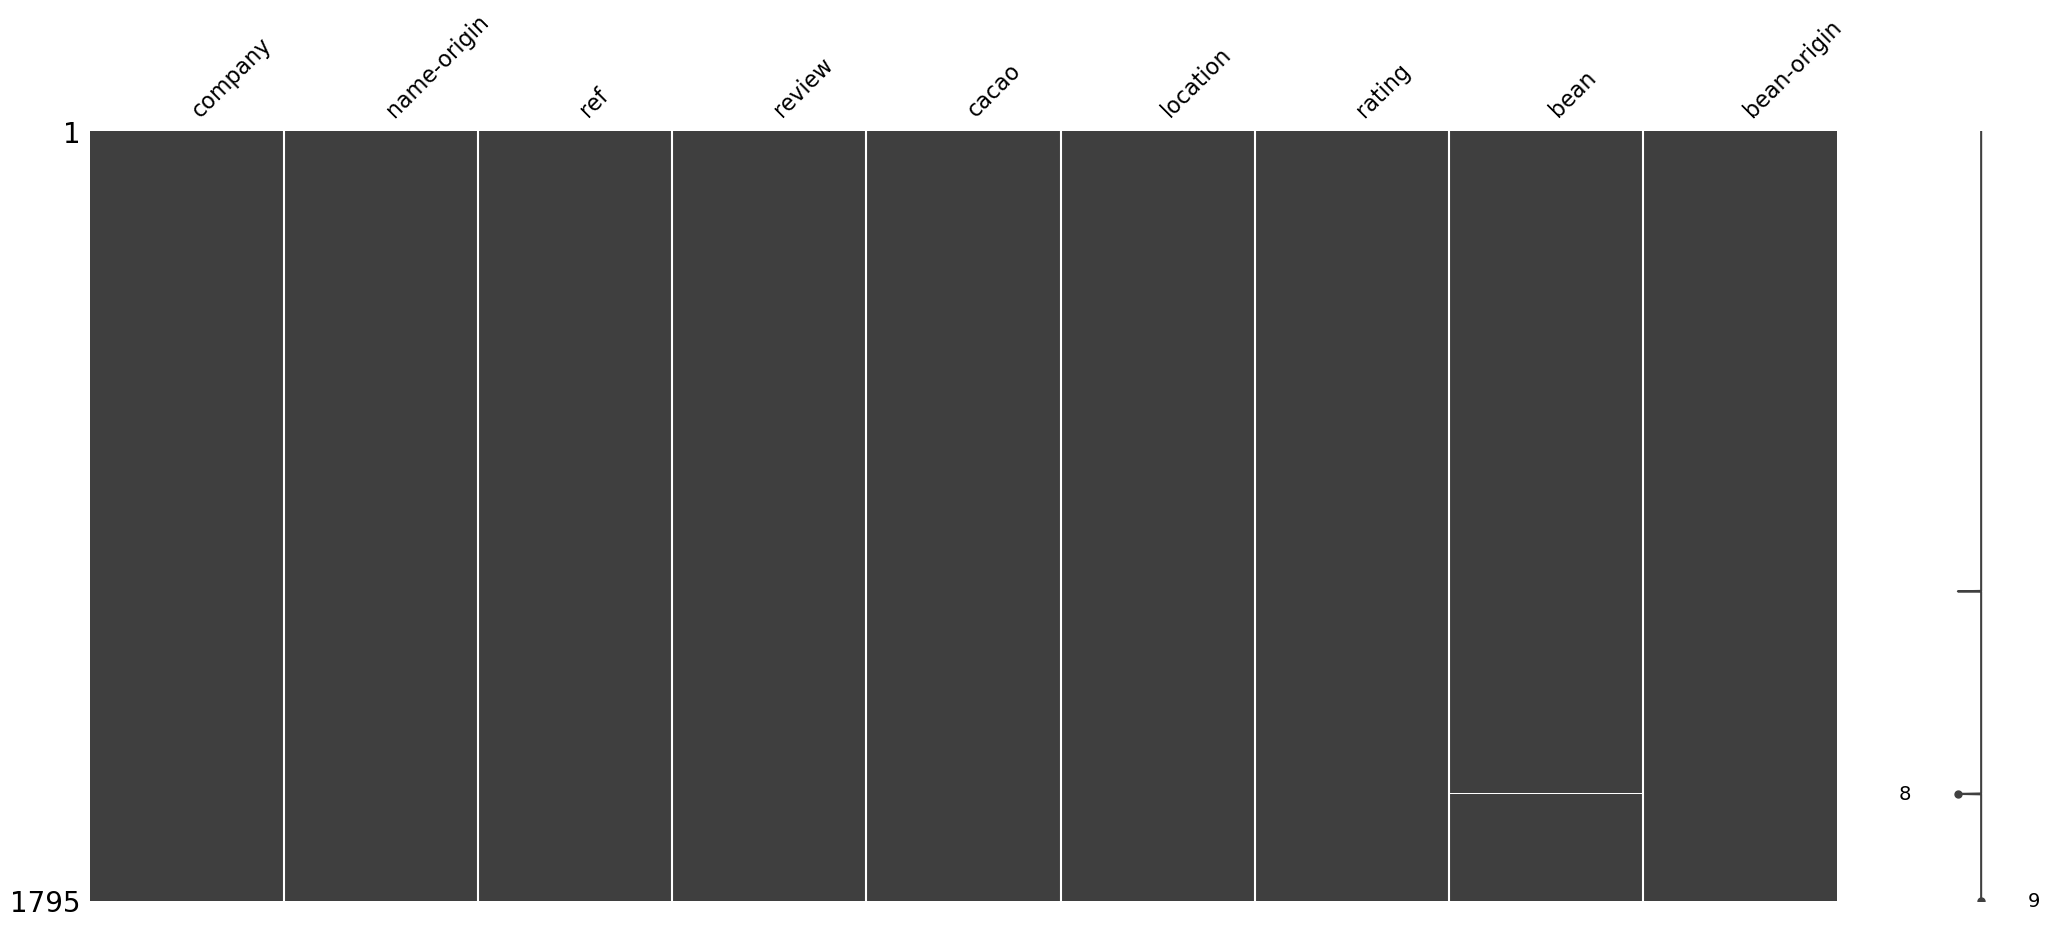

In [178]:
msno.matrix(dq)

In [190]:
# nueva variable
dq['pur']=0 

In [191]:
# Cambio de tipo de dato a las variables

dq['cacao']=dq['cacao']. astype ( str )
dq['cacao2']=dq['cacao'].apply(lambda x: x[:-1])
dq['cacao2']=dq['cacao2'].astype(float)

# Se rellena la variable pur

dq['pur']= dq['cacao2'].apply(lambda x: 'BAJO' if 0 < x < 60 else ('INTERMEDIO' if 60 <= x < 80 else ('ALTO' if 80 <= x < 100 else 'PURO')))

dq=dq.drop(['cacao2'], axis=1)  

In [192]:
dq.head(3)

,company,name-origin,ref,review,cacao,location,rating,bean,bean-origin,pur
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,INTERMEDIO
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,INTERMEDIO
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,INTERMEDIO


TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
dq['MOD_INGLES_DESEM2'] = dq['MOD_INGLES_PUNT'].apply(lambda x:0 if x <0 else(0.5 if 0 >= x <= 122 else(1 
if 123 <= x <= 145 else (2 if 146 <= x <= 170 else(3 if 171<=x<=199 else(4) )))))